# Breast Cancer Detection


## Introduction

  In this notebook, I will try to build a machine model that helps physicians to diagnose beast cancer with data on patients' biopsied breast cells. Specifically, I will investigate which cell features are crucial in breat cancer detection. The original dataset contains 15,955 observations on patients' 9 features of their biopsied breast cells and their diagnositics on breast cancer -- either benign or malignant. The data anlysis process that will be present below can be described in four parts: (1) data preparation; (2) exploratory data analysis; (3) model estimation and evaluation; (4) insights and conclusions.

## 1. Data Preparation: recoding and missing value

In [94]:
# Import necessary libraries

import docx2txt
import pandas as pd
from io import StringIO
import numpy as np
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Read the data and preview the data

my_text = docx2txt.process("Copy of breast-cancer-wisconsin.docx")
my_str = StringIO(my_text)
data = pd.read_csv(my_str, index_col=0, header=0)
data.head(10)

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,,
0,1241035,7,8,3,7,4,5,7,8,2,4
1,1107684,6,10,5,5,4,10,6,10,1,4
2,691628,8,6,4,10,10,1,3,5,1,4
3,1226612,7,5,6,3,3,8,7,4,1,4
4,1142706,5,10,10,10,6,10,6,5,2,4
5,601265,10,4,4,6,2,10,2,3,1,4
6,378275,10,9,7,3,4,2,7,7,1,4
7,1142706,5,10,10,10,6,10,6,5,2,4
8,601265,10,4,4,6,2,10,2,3,1,4


In [7]:
# Examine columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15855 entries, 0 to 15854
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           15855 non-null  int64 
 1   Clump Thickness              15855 non-null  int64 
 2   Uniformity of Cell Size      15827 non-null  object
 3   Uniformity of Cell Shape     15827 non-null  object
 4   Marginal Adhesion            15827 non-null  object
 5   Single Epithelial Cell Size  15827 non-null  object
 6   Bare Nuclei                  15827 non-null  object
 7   Bland Chromatin              15827 non-null  object
 8   Normal Nucleoli              15827 non-null  object
 9   Mitoses                      15827 non-null  object
 10  Class                        15827 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.5+ MB


**Note:** only ID and Clump Thickness columns are encoded as integer as shown above. This indicates me to further examine the unique values in other columns and suggests to recode some of them.

In [8]:
# recode missing values and data type

cols = data.columns.drop('ID')

for col in data[cols]:
    print(data[col].unique())

[  7   6   8   5  10   3   4   1  70  80 100   2   9  50  30  40  60]
['8' '10' '6' '5' '4' '9' '3' '1' 'No idea' '2' '7' '50' '100' '30' nan
 '#' '?' '80' '40' '60' '90' '20']
['3' '5' '4' '6' '10' '7' '1' 'No idea' '2' '60' '100' '40' nan '#' '9'
 '8' '?' '30' '50' '70']
['7' '5' '10' '3' '6' '4' '1' '2' 'No idea' '30' '40' nan '#' '8' '?' '70'
 '60' '100' '50' '9' '20']
['4' '10' '3' '6' '2' '8' 'No idea' '1' '30' nan '5' '#' '?' '40' '20' '7'
 '60' '80' '100' '9']
['5' '10' '1' '8' '2' '3' '6' 'No idea' '?' '80' '60' '30' nan '100' '#'
 '9' '50' '7' '4' '20']
['7' '6' '3' '2' '4' 'No idea' '1' '5' '70' '30' nan '40' '#' '10' '8' '?'
 '20' '9' '60' '50']
['8' '10' '5' '4' '3' '7' '2' '6' '9' '1' 'No idea' '40' '90' '20' nan
 '30' '#' '?' '80' '60' '50' '100' '70']
['2' '1' '7' 'No idea' '3' '10' '70' '8' nan '20' '#' '6' '?' '4' '5']
['4' '2' 'No idea' '40' nan '#' '?' '20']


In [16]:
 # recode missing values with np.NaN
    
data = data.replace('?|#|No idea', np.NaN)    

# convert object type to float

cols = data.columns.drop('ID', 'Clump Thickness')
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15855 entries, 0 to 15854
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           15855 non-null  int64  
 1   Clump Thickness              15855 non-null  int64  
 2   Uniformity of Cell Size      15776 non-null  float64
 3   Uniformity of Cell Shape     15776 non-null  float64
 4   Marginal Adhesion            15776 non-null  float64
 5   Single Epithelial Cell Size  15776 non-null  float64
 6   Bare Nuclei                  15760 non-null  float64
 7   Bland Chromatin              15776 non-null  float64
 8   Normal Nucleoli              15776 non-null  float64
 9   Mitoses                      15776 non-null  float64
 10  Class                        15776 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 1.5 MB


In [17]:
data.describe()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,1.585500e+04,15855.000000,15776.000000,15776.000000,15776.000000,15776.000000,15760.000000,15776.000000,15776.000000,15776.000000,15776.000000
mean,1.125972e+06,8.263198,7.475849,6.091405,5.489351,4.597807,7.004822,5.019397,5.406440,1.829361,4.291836
std,9.957879e+05,7.393603,6.800880,5.523121,6.109255,4.832097,7.058168,4.856222,5.874417,2.857843,3.537944
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,1.076352e+06,7.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,4.000000
50%,1.111249e+06,8.000000,6.000000,5.000000,4.000000,4.000000,8.000000,4.000000,5.000000,1.000000,4.000000
75%,1.198641e+06,10.000000,10.000000,7.000000,7.000000,4.000000,10.000000,7.000000,8.000000,2.000000,4.000000
max,1.345435e+07,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,70.000000,100.000000,70.000000,40.000000


**Note:** According to the code book, features about biopsied breast cells are coded ranging from 1 to 10 and brease cancer status is binary -- 2 for benign and 4 for malignant. Therefore, values that exceed 10 for features about biopsied breast cells and values other than 2 and 4 in column *Class* may indicate potential coding errors. Two strategies are taken to address this: \
(a). For features about biopsied breast cells, I will take original values divided by 10 to get new values considering  these numbers may be human-coded errors. \
(b). For breast cancer class: I decide to drop observations with values other than 2 and 4 since it's hard to figure out the true class of those observations and it may confuse my classifiers later. This leads to a removal of 156 records.

In [95]:
# values beyond expected range

for col in cols:
    for i in range(len(data[col])):
        if data[col][i] > 10:
            data[col][i] %= 10

# remove data where class is 0

sub_data = data[data['Class']!=0]

# recode Class variable to a 0 and 1 binary variable: 0 -- benign and 1 -- malignant

sub_data["Cancerous"] = 1
sub_data.loc[sub_data["Class"] == 2, "Cancerous"] = 0

data.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,,
0,1241035,7,8.0,3.0,7.0,4.0,5.0,7.0,8.0,2.0,4.0
1,1107684,6,10.0,5.0,5.0,4.0,10.0,6.0,10.0,1.0,4.0
2,691628,8,6.0,4.0,10.0,10.0,1.0,3.0,5.0,1.0,4.0
3,1226612,7,5.0,6.0,3.0,3.0,8.0,7.0,4.0,1.0,4.0
4,1142706,5,10.0,10.0,10.0,6.0,10.0,6.0,5.0,2.0,4.0


In [27]:
# missing value check

data_missing = sub_data.isnull().sum()
print(data_missing)

# missing values in percentage

data_missing/len(sub_data)

ID                              0
Clump Thickness                 0
Uniformity of Cell Size        79
Uniformity of Cell Shape       79
Marginal Adhesion              79
Single Epithelial Cell Size    79
Bare Nuclei                    95
Bland Chromatin                79
Normal Nucleoli                79
Mitoses                        79
Class                          79
Cancerous                       0
dtype: int64


ID                             0.000000
Clump Thickness                0.000000
Uniformity of Cell Size        0.005032
Uniformity of Cell Shape       0.005032
Marginal Adhesion              0.005032
Single Epithelial Cell Size    0.005032
Bare Nuclei                    0.006051
Bland Chromatin                0.005032
Normal Nucleoli                0.005032
Mitoses                        0.005032
Class                          0.005032
Cancerous                      0.000000
dtype: float64

In [28]:
print(data[data.isna().any(axis=1)])

            ID  Clump Thickness  Uniformity of Cell Size  \
Index                                                      
30     1226612                7                      NaN   
70     1076352                3                      NaN   
157    1057067                1                      1.0   
355    1111249               10                      NaN   
396    1111249               10                      NaN   
...        ...              ...                      ...   
15111  1197510                5                      1.0   
15460   704168                4                      6.0   
15494  1112209                8                      NaN   
15680  1111249               10                      NaN   
15829  1107684                6                      NaN   

       Uniformity of Cell Shape  Marginal Adhesion  \
Index                                                
30                          NaN                NaN   
70                          NaN                NaN   
157

**Note:** In this case, observations with missing values are removed for two reasons: first, it only accounts for a small proportion of our data, say 5% to 6%; second, information are consistently missing for certain patitens and those patients have more missing than recorded values. Therefore, imputation is not considered to be an optimal choice in this case. 

In [30]:
sub_data = sub_data.dropna(subset=['Class', 'Bare Nuclei'])
sub_data.describe()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Cancerous
count,1.560400e+04,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000
mean,1.033604e+06,7.587413,6.896950,5.624968,5.033389,4.221097,6.466675,4.614586,4.972315,1.663932,3.943348,0.971674
std,2.761056e+05,2.164067,2.466078,2.131174,2.910681,2.096365,3.221766,1.896105,2.817212,1.502325,0.331816,0.165908
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
25%,1.076352e+06,7.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,4.000000,1.000000
50%,1.111249e+06,8.000000,6.000000,5.000000,4.000000,4.000000,8.000000,4.000000,5.000000,1.000000,4.000000,1.000000
75%,1.198641e+06,10.000000,10.000000,7.000000,7.000000,4.000000,10.000000,7.000000,8.000000,2.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,1.000000


Altogther, 251 records are removed from original dataset in this section and it results in a dataset containing 15604 records for future analysis.

## 2. Exploratory Data Analaysis

1    15162
0      442
Name: Cancerous, dtype: int64


Text(0.5, 1.0, 'Class Distributions \n (0: Benign || 1: Malignant)')

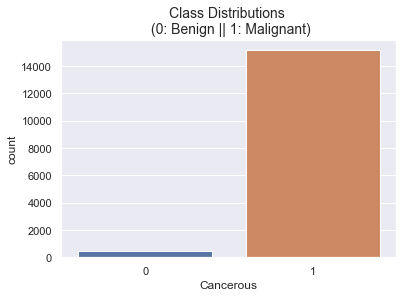

In [90]:
# Dependent/Target variable: breast cancer class

print(sub_data['Cancerous'].value_counts()) 

sns.countplot('Cancerous', data=sub_data)
plt.title('Class Distributions \n (0: Benign || 1: Malignant)', fontsize=14)

**Note:** Imbalanced data -- most patients in our database were diagnosed as malignant. This may affect the model performance in later steps and need our attention to address it in later stage.

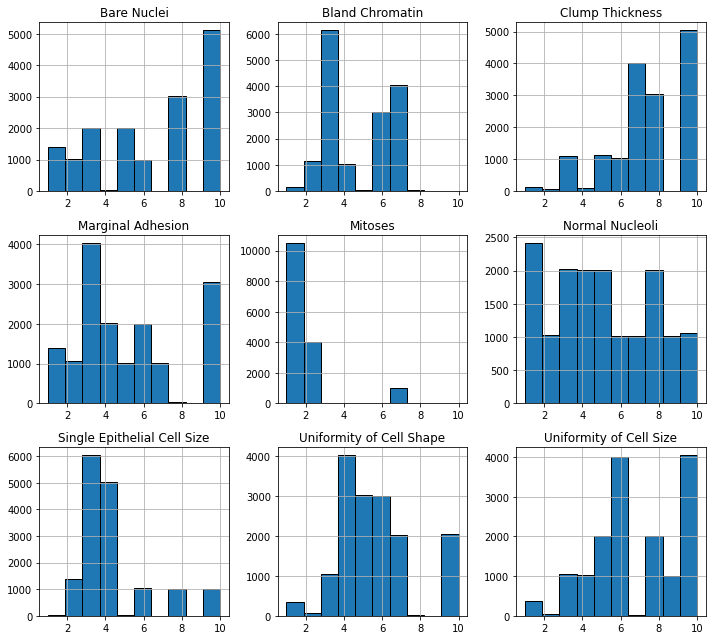

In [32]:
# Predictors: features about biopsied breast cells

x_cols = sub_data.columns.drop(['ID', 'Class', 'Cancerous'])
sub_data[x_cols].hist(figsize=(10,9), ec="k")
plt.tight_layout()
plt.show()

First, I briefly examine the distribution of each predictors. It indicates that variables, *Mitoses* and *Single Epithelial Cell Size*, have less variations. 

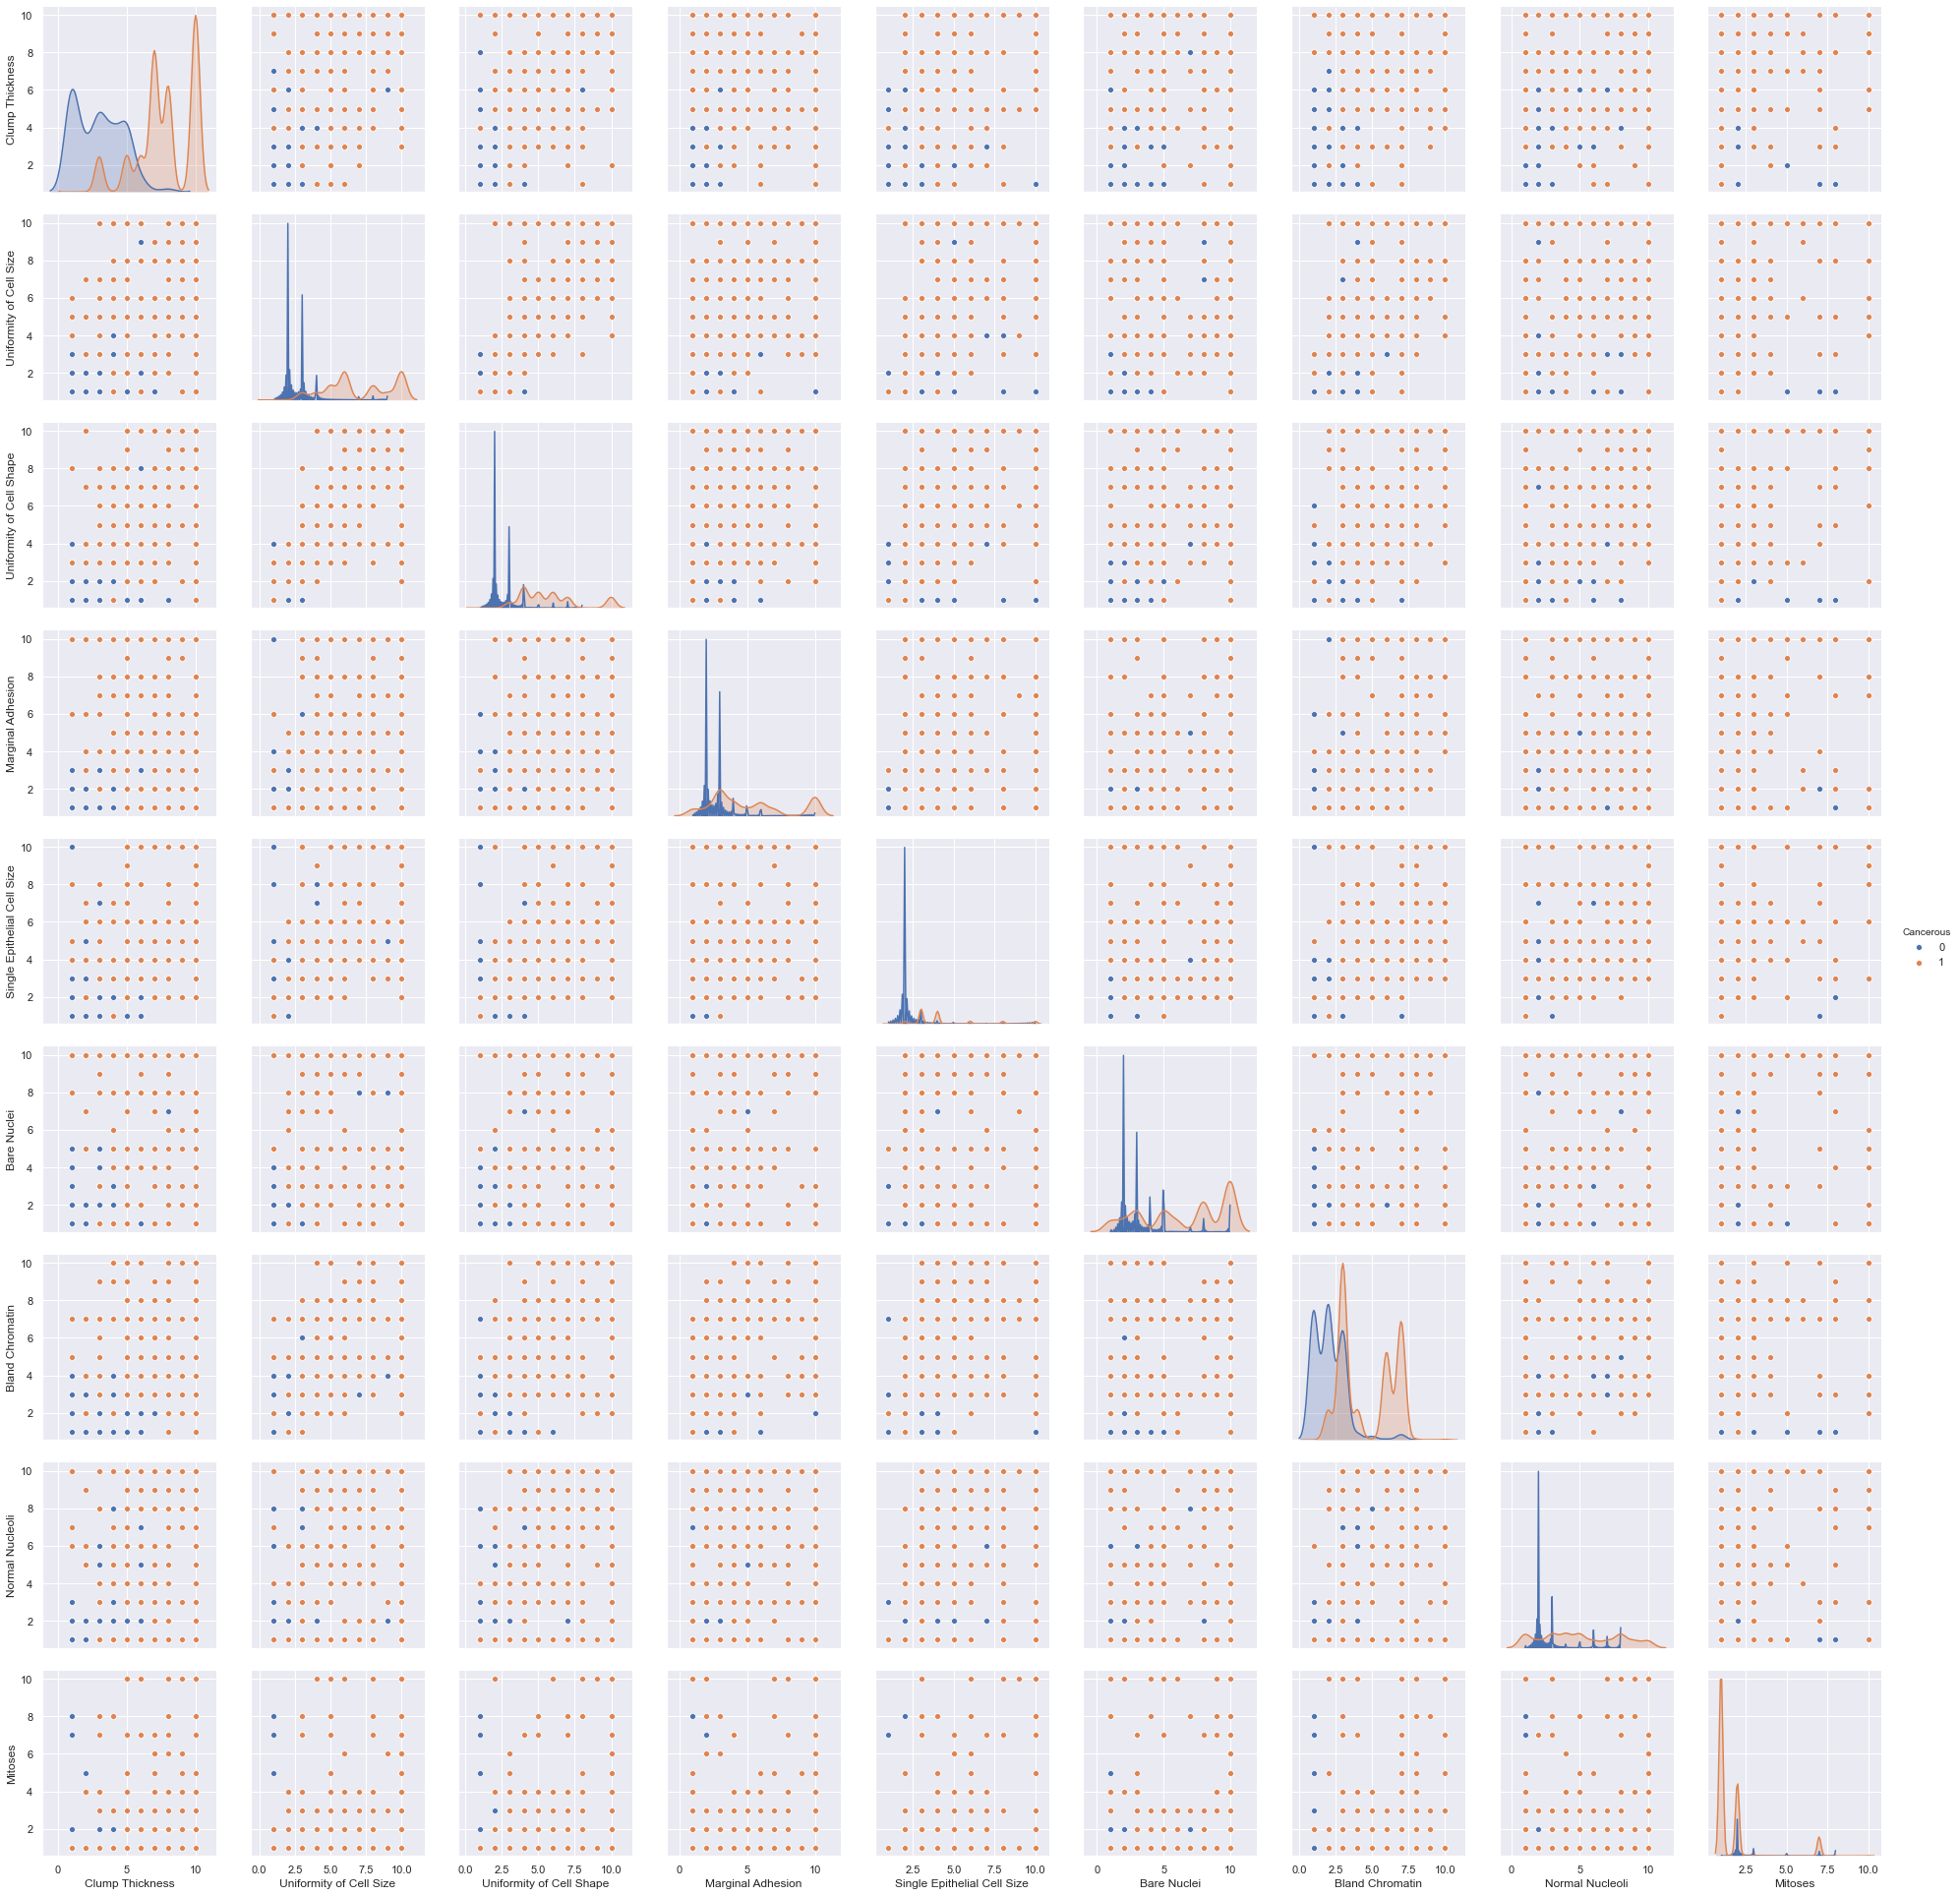

In [39]:
sns.pairplot(sub_data, vars = x_cols, hue = "Cancerous", height = 3)
plt.show()

The orange in the plot above represents for "1 - Malignant" while the blue represents for "0 - Benign". Plots on diagonal are distributions of predictors by cancerous class, providing insightful information about the relationships between predictors and target. It seems that, malignant breast cells tend to outscore benign breast cells on most of the features about biopsied breast cells, except for cells' bare nuclei, normal nucleoli and mitoses. However, malignant and benign breat cells do not have much difference with each other in terms of cells' bare nuclei and normal nuclioli. Furthermore, malignant breast cells have relatively lower score on mitoses than the benign ones. Note that our dataset is extremely imbalanced in terms of malignant and benign cases, therefore, these plots could only be used for preliminary analysis.

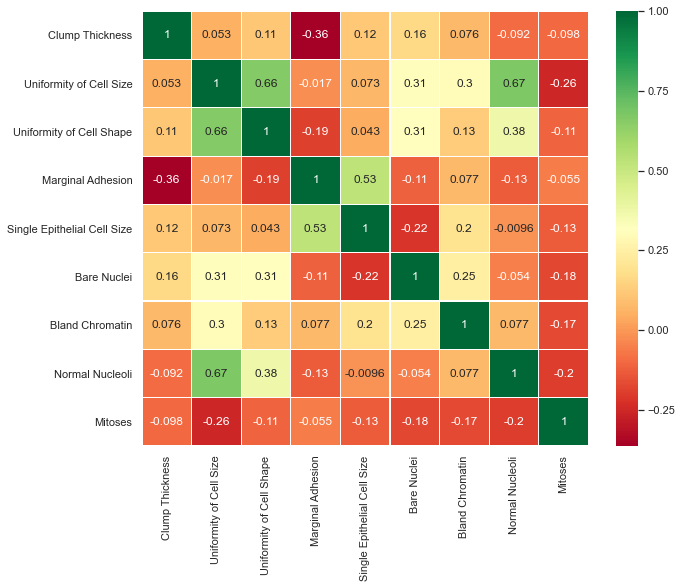

In [40]:
# correlation examination

sns.heatmap(sub_data[x_cols].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Lastly, I examine the correlation among predictors in order to avoid multicollinearity between predictors. As shown above, there are only slight to moderate correlations among predictors. Therefore, I chose to keep all variables in this case for analysis.

## 3. Model Estimation and Evaluation

As mentioned above, an exploratory data analysis shows that the dataset has an imbalanced class concern. Therefore, in this section, I will repeat model estimation and evalution twice: one for original dataset and one for oversampled dataset. Synthetic Minority Oversampling Technique (SMOTE) is chosen in this case to oversample benign cases to create a balanced dataset for analysis. Regarding to model selection, considering this is a typical binary classication problem, I choose to fit the data in both a logistic regression model and a random forest classification model. Confusion matrix is selected to be the most important model performation evaluation criteria. Specifically, in this particular case, false positive (being diagnosed as malignant cell when it is benign) is preferred than false negative (being diagnosed as benign when it is malignant) given the higher cost of miss-diagnostics on malignant cells.

### (1) Fit logistic and random forest model with original dataset;

In [51]:
# Original dataset -- imbalanced

y = sub_data["Cancerous"]
X = sub_data[x_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)


# Baseline logitic regression

lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

lr_matrix = metrics.confusion_matrix(y_test, lr_pred)


In [52]:
# random forest classification

rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

rfc_matrix = metrics.confusion_matrix(y_test, rfc_pred)

### (2) Fit regression and random forest models again with a synthetic balanced dataset



In [53]:
# create a balanced dataset with SMOTE technique
sm = SMOTE(random_state=13)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [64]:

# SMOTE logitic regression

smote_lr = LogisticRegression()
smote_lr.fit(X_train,y_train)
smote_lr_pred = smote_lr.predict(X_test)

smote_lr_matrix = metrics.confusion_matrix(y_test, smote_lr_pred)

In [65]:
# SMOTE random forest classification

smote_rfc = RandomForestClassifier(n_estimators=10)
smote_rfc.fit(X_train, y_train)
smote_rfc_pred = smote_rfc.predict(X_test)

smote_rfc_matrix = metrics.confusion_matrix(y_test, smote_rfc_pred)

### (3) model evaluation

In [50]:
print('Baseline Logistic Regression:')
print(classification_report(y_test, lr_pred))

print('Baseline Random Forest Classification:')
print(classification_report(y_test, rfc_pred))

print('SMOTE Logistic Regression:')
print(classification_report(y_test, smote_lr_pred))

print('SMOTE Random Forest Classification:')
print(classification_report(y_test, smote_rfc_pred))

Baseline Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       121
           1       1.00      1.00      1.00      3780

    accuracy                           1.00      3901
   macro avg       0.99      0.97      0.98      3901
weighted avg       1.00      1.00      1.00      3901

Baseline Random Forest Classification:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       121
           1       1.00      1.00      1.00      3780

    accuracy                           1.00      3901
   macro avg       0.99      0.97      0.98      3901
weighted avg       1.00      1.00      1.00      3901

SMOTE Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       121
           1       1.00      1.00      1.00      3780

    accuracy                           1.00      3901
   macro avg       0.99      0.9

A brief review of the model performance suggests that there are no significant difference across models in terms of recall, precision and accuracy. The logistic regression models seem to slightly outperform the random forest classification models in both cases, either with original dataset or with a synthetic balanced dataset.

[Text(0, 0.5, 'Benign'), Text(0, 1.5, 'Malignant')]

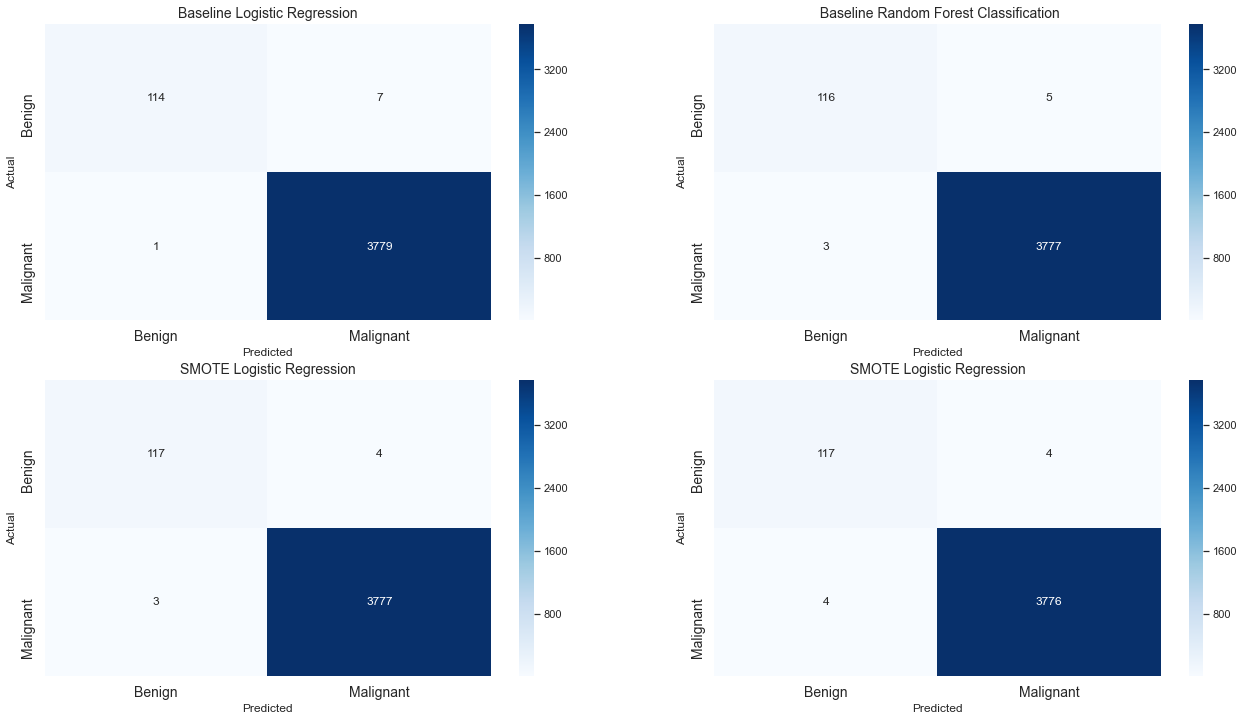

In [77]:
fig, ax = plt.subplots(2, 2,figsize=(22,12))

sns.heatmap(lr_matrix, ax=ax[0][0], annot=True, cmap=plt.cm.Blues, fmt='g')
ax[0, 0].set_title("Baseline Logistic Regression", fontsize=14)
ax[0, 0].set_xlabel('Predicted')
ax[0, 0].set_ylabel('Actual')
ax[0, 0].set_xticklabels(["Benign", "Malignant"], fontsize=14)
ax[0, 0].set_yticklabels(["Benign", "Malignant"], fontsize=14)

sns.heatmap(rfc_matrix, ax=ax[0][1], annot=True, cmap=plt.cm.Blues, fmt='g')
ax[0][1].set_title(" Baseline Random Forest Classification", fontsize=14)
ax[0][1].set_xlabel('Predicted')
ax[0][1].set_ylabel('Actual')
ax[0][1].set_xticklabels(["Benign", "Malignant"], fontsize=14)
ax[0][1].set_yticklabels(["Benign", "Malignant"], fontsize=14)

sns.heatmap(smote_lr_matrix, ax=ax[1][0], annot=True, cmap=plt.cm.Blues, fmt='g')
ax[1][0].set_title("SMOTE Logistic Regression", fontsize=14)
ax[1][0].set_xlabel('Predicted')
ax[1][0].set_ylabel('Actual')
ax[1][0].set_xticklabels(["Benign", "Malignant"], fontsize=14)
ax[1][0].set_yticklabels(["Benign", "Malignant"], fontsize=14)

sns.heatmap(smote_rfc_matrix, ax=ax[1][1], annot=True, cmap=plt.cm.Blues, fmt='g')
ax[1][1].set_title("SMOTE Logistic Regression", fontsize=14)
ax[1][1].set_xlabel('Predicted')
ax[1][1].set_ylabel('Actual')
ax[1][1].set_xticklabels(["Benign", "Malignant"], fontsize=14)
ax[1][1].set_yticklabels(["Benign", "Malignant"], fontsize=14)


Based on the confusion matrices above, it suggests that the baseline logistic regression model performs the best as it reports the least false negative cases. It is less likely to miss the potential malignant breast cells compared to other models at the cost of a slightly higher likelihood of mis-declaring a malignant breast cancer. In detail, among 3780 malignant cases in our test set, the baseline logistic regression model only misidentifies 1 malignant breast cell as benign at the cost of 7 benign breast cells are predicted as malignant. In practice, although it is ideal to have an accurate prediction on both cases, but the cost of missing to identify malignant breat cells is much higher. Therefore, the baseline logistic regression model is selected.

## 4. Insights and Conclusions
### (1) Feature Importance

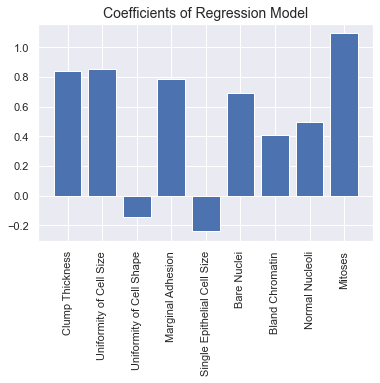

In [84]:
# Explore predictor coefficients

coef = lr.coef_[0]
plt.bar([x for x in x_cols], coef)
plt.xticks(rotation=90)
plt.title("Coefficients of Regression Model", fontsize =14)
plt.show()

Based on model estimation, only the coefficients for *Uniformity of Cell Size* and *Single Epithelical Cell Size* have negative coefficients. In other words, higher scores on these two variables indicate less likelihood of being dianosed as malignant breast cells. Fore the rest predictors, higher scores increased the odds ratio of being dianosed as malignant breast cells.

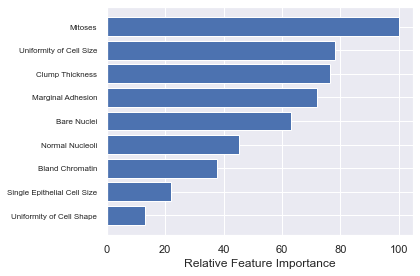

In [89]:
# Feature importance 

feature_importance = abs(coef)
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

Concise Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       121
           1       1.00      1.00      1.00      3780

    accuracy                           1.00      3901
   macro avg       0.99      0.97      0.98      3901
weighted avg       1.00      1.00      1.00      3901



[Text(0, 0.5, 'Benign'), Text(0, 1.5, 'Malignant')]

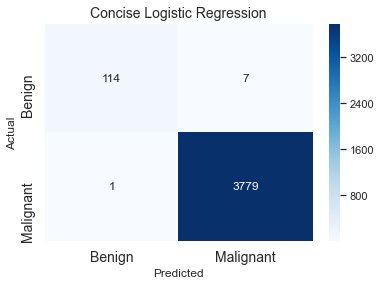

In [93]:
# Feature Reduction
sub_x = sub_data.columns.drop(['ID', 'Class', 'Cancerous', 'Uniformity of Cell Shape','Single Epithelial Cell Size', 'Bland Chromatin'])

y = sub_data["Cancerous"]
X = sub_data[sub_x]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

concise_lr = LogisticRegression()
concise_lr.fit(X_train,y_train)
concise_lr_pred = concise_lr.predict(X_test)


print('Concise Logistic Regression:')
print(classification_report(y_test, lr_pred))

ax= plt.subplot()
sns.heatmap(lr_matrix,  annot=True, cmap=plt.cm.Blues, fmt='g')
ax.set_title("Concise Logistic Regression", fontsize=14)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(["Benign", "Malignant"], fontsize=14)
ax.set_yticklabels(["Benign", "Malignant"], fontsize=14)

The relative feature importance plot shows that breast cells' mitosis is the most important feature in predicting cancerous status. Following that, breast cells' size uniformity and clump thickness have roughly same importance in predictions. In contrast, the uniformity of breast cells' shape, single epithelical cell size, bland chromatin are less informative in breast cancer prediction. Event after I remove those features and refit the model, model performance does not get worse in term of fasle negative prediction.

### Conclusion

  In this notebook, I use a dataset which contains 9 features on breast cells to predict breast cell cancerous status. A data cleaning process reduces size of dataset from 15,855 to 15,804 due to removal of missing values. The exploratory data analysis briefly examines the target variable (442 benign cells versus 15,162 malignant cells), relationships between target variable and predictors, and the relationships among predictors. Then when I fit the data to multiple models with and without oversample the minority benign class, and finds that logistic regression model with original imbalanced data performs the best in term of predicting the least false nagative cases. In the final step, the coefficients and relative feature importance for this model is discussed.\
  \
  In practice, a physician could utilize this model to predict whether a breast cell is malignant or not based on its multiple features, including the clump thickness, the uniformity of cell size and cell shape, the marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal ncleoli and mitoses. Most commonly, the relatively high scores on those breat cells' indicators are related with higher likelihood of being malignant. However, lower scores on the uniformity of cell shape and single epithelial cell size are potential indicators of malignant breast cells. \
  \
  Doubtlessly, there is a non-zero cost in time and money to collect each feature about a given cell. To povide the most cost-effective method to detect breast cancer, this notebook evaluates the relative importance of those features. It reveals that cells' mitoses, size uniformity and clump thickness are top 3 important features. Comparitvely, breast cells' shape uniformity, single epithelial cell size are less informative in breast cancer detection. Breast cancer prediction without these features is also identified to be reliable in this case.
 